<a href="https://colab.research.google.com/github/Vishakhaagrawal23/Facemask-Detector/blob/main/trainCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## **Addding the dataset**

In [6]:
import os
os.environ['KAGGLE_USERNAME']='vishakhaagrawal2303'
os.environ['KAGGLE_KEY']='9a618cdd4c520dc959e5962149f10ee5'

In [7]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 98% 203M/207M [00:02<00:00, 94.0MB/s]
100% 207M/207M [00:02<00:00, 97.8MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

## **Building the CNN**

In [9]:
#Initialising the CNN
classifier = Sequential()

In [10]:
#S1 Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))


In [11]:
#S2 Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
#Dropout to avoid overfitting
classifier.add(Dropout(0.5))

In [13]:
# Adding 2nd convolution layer
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))


In [14]:
#S3 Flattening
classifier.add(Flatten())

In [15]:
#S4 Full Connection
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [16]:
#S5 Compiling the cnn
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## **Image Preprocessing (Image Augmentation)**

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=40,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
                                                  'New Masks Dataset/Train',
                                                   target_size=(128, 128),
                                                   batch_size=32,
                                                   class_mode='binary')

test_set = test_datagen.flow_from_directory(
                                            'New Masks Dataset/Test',
                                             target_size=(128, 128),
                                             batch_size=32,
                                             class_mode='binary')

validation_set = validation_datagen.flow_from_directory(
                                                       'New Masks Dataset/Validation',
                                                        target_size=(128, 128),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


## **Fitting the CNN to the dataset**

In [18]:
history = classifier.fit(
                        training_set,
                        steps_per_epoch=int(300/32),
                        epochs=50,
                        validation_data=validation_set,
                        validation_steps=int(306/32)
                         )

Epoch 1/50
9/9 [==============================] - 15s 963ms/step - loss: 0.7110 - accuracy: 0.5039 - val_loss: 0.6830 - val_accuracy: 0.6562
Epoch 2/50
9/9 [==============================] - 8s 887ms/step - loss: 0.7031 - accuracy: 0.5445 - val_loss: 0.6615 - val_accuracy: 0.6632
Epoch 3/50
9/9 [==============================] - 8s 901ms/step - loss: 0.6406 - accuracy: 0.6469 - val_loss: 0.6158 - val_accuracy: 0.7639
Epoch 4/50
9/9 [==============================] - 8s 904ms/step - loss: 0.5986 - accuracy: 0.6576 - val_loss: 0.5766 - val_accuracy: 0.6806
Epoch 5/50
9/9 [==============================] - 7s 876ms/step - loss: 0.5769 - accuracy: 0.6654 - val_loss: 0.5537 - val_accuracy: 0.7326
Epoch 6/50
9/9 [==============================] - 7s 895ms/step - loss: 0.5572 - accuracy: 0.7046 - val_loss: 0.4486 - val_accuracy: 0.8021
Epoch 7/50
9/9 [==============================] - 8s 904ms/step - loss: 0.4626 - accuracy: 0.7828 - val_loss: 0.3949 - val_accuracy: 0.8368
Epoch 8/50
9/9 [===

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epoch')

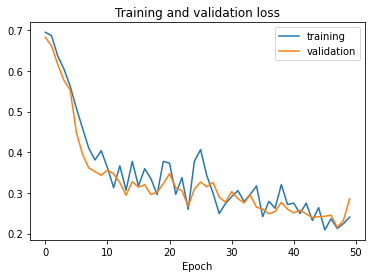

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

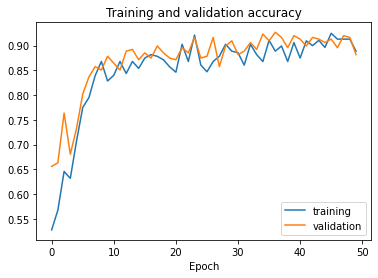

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')

In [23]:
test_loss , test_accuracy = classifier.evaluate(test_set)
print('test loss:{} test accuracy{}'.format(test_loss,test_accuracy))

4/4 [==============================] - 1s 260ms/step - loss: 0.2045 - accuracy: 0.9300
test loss:0.20449112355709076 test accuracy0.9300000071525574
